In [1]:
import os 
import sys

path_to_add = os.path.join(os.getcwd(), '..')

project_root = os.path.abspath(path_to_add)

if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Path added: {project_root}")
else:
    print(f"Path already exists: {project_root}")

Path added: /Users/abhiramakarthikeya/Documents/Masters/Classes/Semester 1/Data Structures and Algorithms/Group Assignment 1/dsa-gp1-schedule-system


In [2]:
from src.array_list import ArrayList
from src.linked_list import LinkedList
from src import sorts_array_list, sorts_linked_list

import time
import random
import matplotlib.pyplot as plt


In [3]:
def random_event(i):
    # random dates within Oct 2025 (1..30)
    day = random.randint(1, 30)
    date = f"2025-10-{day:02d}"
    hour = random.randint(0,23)
    minute = random.randint(0,59)
    time_s = f"{hour:02d}:{minute:02d}"
    return {"id": i, "title": f"Event{i}", "date": date, "time": time_s, "location": "Hall"}

def make_array(n):
    return [random_event(i) for i in range(n)]

def make_linked_list(n):
    ll = LinkedList()
    for i in range(n):
        ll.insert(random_event(i))
    return ll


In [4]:
def time_func_array(sort_func, arr, runs=3):
    # make copies to avoid sorting-in-place side-effects where appropriate
    times = []
    for _ in range(runs):
        a_copy = [e.copy() for e in arr]
        start = time.time()
        # some functions return new list (merge/quick), some sort in place (insertion)
        result = sort_func(a_copy)
        # ensure result is list form
        if result is None:
            # in-place: arr is sorted
            pass
        end = time.time()
        times.append(end - start)
    return sum(times)/len(times)

def time_func_linked_list(sort_func, linked, runs=3):
    times = []
    for _ in range(runs):
        # create a fresh linked list copy
        arr = linked_to_list(linked)  # convert to python list
        ll_copy = LinkedList()
        for e in arr:
            ll_copy.insert(e.copy())
        start = time.time()
        sort_func(ll_copy)
        end = time.time()
        times.append(end - start)
    return sum(times)/len(times)

# small helper to convert linked to list (we replicate here for notebook)
def linked_to_list(linked):
    res = []
    cur = linked.head
    while cur:
        res.append(cur.event.copy())
        cur = cur.next
    return res


In [6]:
sizes = [50, 500, 5000]
array_algos = [
    ("Insertion", sorts_array_list.insertion_sort_array),
    ("Merge", sorts_array_list.merge_sort_array),
    ("Quick", sorts_array_list.quick_sort_array),
]
linked_algos = [
    ("Insertion", sorts_linked_list.insertion_sort_linked_list),
    ("Merge", sorts_linked_list.merge_sort_linked_list),
    ("Quick", sorts_linked_list.quick_sort_linked_list),
]

# store results
results_array = {name: [] for name, _ in array_algos}
results_linked = {name: [] for name, _ in linked_algos}

for n in sizes:
    print("Measuring for n =", n)
    arr = make_array(n)
    ll = make_linked_list(n)

    for name, func in array_algos:
        t = time_func_array(func, arr, runs=3)
        print(f" Array {name}: {t:.4f}s")
        results_array[name].append(t)

    for name, func in linked_algos:
        # linked timing uses the linked constructed above
        t = time_func_linked_list(func, ll, runs=3)
        print(f" Linked {name}: {t:.4f}s")
        results_linked[name].append(t)


Measuring for n = 50
 Array Insertion: 0.0004s
 Array Merge: 0.0003s
 Array Quick: 0.0003s
 Linked Insertion: 0.0007s
 Linked Merge: 0.0003s
 Linked Quick: 0.0002s
Measuring for n = 500
 Array Insertion: 0.0278s
 Array Merge: 0.0034s
 Array Quick: 0.0025s
 Linked Insertion: 0.0475s
 Linked Merge: 0.0031s
 Linked Quick: 0.0021s
Measuring for n = 5000
 Array Insertion: 2.5209s
 Array Merge: 0.0432s
 Array Quick: 0.0301s
 Linked Insertion: 4.3988s
 Linked Merge: 0.0406s
 Linked Quick: 0.0292s


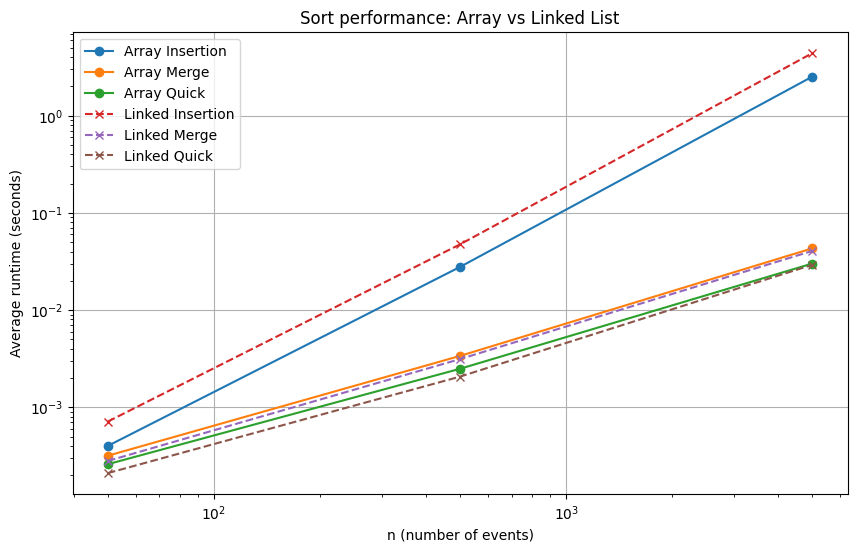

In [9]:
plt.figure(figsize=(10,6))
for name in results_array:
    plt.plot(sizes, results_array[name], marker='o', label=f"Array {name}")
for name in results_linked:
    plt.plot(sizes, results_linked[name], marker='x', linestyle='--', label=f"Linked {name}")
plt.xlabel("n (number of events)")
plt.ylabel("Average runtime (seconds)")
plt.title("Sort performance: Array vs Linked List")
plt.legend()
plt.xscale('log')   # makes it easier to see crossovers across orders of magnitude
plt.yscale('log')
plt.grid(True)
plt.show()


## Observations

- **Insertion Sort**: O(n²). Fast on very small n (50) but becomes impractical for n >= 5,000. For arrays, insertion sort benefits from contiguous memory when moving elements, but still O(n²) shifts. For linked lists, insertion sort avoids shifting memory but still requires O(n) search for insertion point per element, so still O(n²).

- **Merge Sort**: O(n log n). On arrays: needs O(n) extra memory but is stable and performs well. On linked lists: merge sort is a natural fit (no extra list allocation required for merging nodes), and typically is faster than quick sort for linked lists because partitioning for quicksort is harder without random access.

- **Quick Sort**: Average-case O(n log n) on arrays and often fastest in practice for arrays, especially with in-place implementations. Our array quicksort uses randomized pivot and three-way partition which handles duplicates well. On linked lists, quicksort implemented using 3-way partitions works but tends to have higher pointer overhead.

### Crossovers
- For the array backend, quick sort often beats merge sort for moderate sizes because of lower constant factors (in-place partitioning, fewer allocations). For very large sizes, the difference diminishes.
- For the linked-list backend, merge sort usually outperforms quick sort due to simpler merges and fewer pointer manipulations.
